In [10]:
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
from PlotFuncs import col_alpha,CurvedText,line_background
from PlotFuncs import BlackHoleSpins, AxionNeutron, MySaveFig
%matplotlib inline


# Force range for lambda in [m] and m_a in [eV]
def mLambda(m_a):
    return 0.1973*1e-6/m_a 

# Scalar-nucleon coupling from Yukawa alpha
def g_scalar_nucleon(alph):
    return sqrt(alph/1.37e37)
        
def MakeJoinedLimit_ScalarNucleon(files,fname,header,nvals=1000):
    dirc = 'limit_data/ScalarNucleon/'
    n = len(files)
    m_min = 100000.0
    m_max = 1e-10
    dats = zeros(shape=(n,nvals))
    for file in files:
        dat = loadtxt(dirc+file+'.txt')
        dat[:,0] = mLambda(dat[:,0])
        m_min = min(m_min,amin(dat[:,0]))
        m_max = max(m_max,amax(dat[:,0]))

    m = logspace(log10(m_min),log10(m_max),nvals)
    for i in range(0,n):
        dat = flipud(loadtxt(dirc+files[i]+'.txt'))
        x = mLambda(dat[:,0])
        y = g_scalar_nucleon(dat[:,1])
        ynew = interp(m,x,y)
        ynew[m<amin(x)] = 1e0
        ynew[m>amax(x)] = 1e0
        dats[i,:] = ynew

    dat = amin(dats,0)
    DAT = column_stack((m,dat))
    savetxt(dirc+fname,DAT,header=header)
    return DAT


# Making the Union of the ISL and WEP tests:
dirc = 'limit_data/ScalarNucleon/'
ISL = ['IUPUI','Stanford','EotWash2006','EotWash2020','HUST2012','HUST2020','Irvine','Wuhan']
EP = ['EotWash_EP_1999','MICROSCOPE','EotWash_EP_2007_left','EotWash_EP_2007_right']
AllLims = ISL+EP
header_ISL = 'Union of inverse square law tests \n m [eV] \t g_s_nucleon [dimensionless]'
header_EP = 'Union of equivalence principle tests \n m [eV] \t g_s_nucleon [dimensionless]'
header_All = 'Union of all tests \n m [eV] \t g_s_nucleon [dimensionless]'
fname_ISL = 'Union_InverseSquareLaw.txt'
fname_EP = 'Union_EquivalencePrinciple.txt'
DAT_ISL = MakeJoinedLimit_ScalarNucleon(ISL,fname_ISL,header_ISL)
DAT_EP = MakeJoinedLimit_ScalarNucleon(EP,fname_EP,header_EP)
DAT_EP = MakeJoinedLimit_ScalarNucleon(AllLims,'Union.txt',header_All)

In [55]:
def FigSetup(xlab=r'Mass [eV]',ylab='$|g_{an}|$',\
                 g_min = 1.0e-26,g_max = 1.0e-10,\
                 m_min = 1.0e-16,m_max = mLambda(1.0e-10),\
                 lw=2.5,lfs=40,tfs=25,tickdir='out',\
                 Grid=False,Shape='Rectangular',mathpazo=False,
                 TopAndRightTicks=False,LambdaAxis=True,UnitAxis=True):

        plt.rcParams['axes.linewidth'] = lw
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif',size=tfs)

        if mathpazo:
            plt.rcParams.update({"text.usetex": True,"font.family": "serif","font.serif": ["Palatino"],})

        if Shape=='Wide':
            fig = plt.figure(figsize=(16.5,5))
        elif Shape=='Rectangular':
            fig = plt.figure(figsize=(16.5,11))

        ax = fig.add_subplot(111)

        ax.set_xlabel(xlab,fontsize=lfs)
        ax.set_ylabel(ylab,fontsize=lfs)

        ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
        ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([m_min,m_max])
        ax.set_ylim([g_min,g_max])

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.xaxis.set_major_locator(locmaj)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.yaxis.set_major_locator(locmaj)
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        if Shape=='Rectangular':
            plt.xticks(rotation=20)

        if Grid:
            ax.grid(zorder=0)

        if LambdaAxis:
            ax2 = ax.twiny()
            ax2.set_xscale('log')
            if UnitAxis:
                ax2.set_xlabel(r"Force range, $\lambda$",fontsize=lfs,labelpad=15)
                xticks = [1.496e11,696340e3,6371e3,1e3,1,0.01,1e-6,1e-9,1e-10]
                xticklabels = [r'AU',r'$R_\odot$',r'$R_\oplus$','km','m','cm',r'\textmu m','nm',r'\AA']
                ax2.set_xticks(xticks)
                ax2.set_xticklabels(xticklabels)
                ax2.set_xlim([mLambda(m_min),mLambda(m_max)])


            else:
                ax2.set_xlim([mLambda(m_min),mLambda(m_max)])
                ax2.set_xlabel(r"$\lambda$ [m]",fontsize=lfs)
                locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
                locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
                ax2.xaxis.set_major_locator(locmaj)
                ax2.xaxis.set_minor_locator(locmin)
                ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
                plt.xticks(rotation=20)                

            ax2.tick_params(which='major',direction=tickdir,width=2.5,length=13,pad=7)
            ax2.tick_params(which='minor',direction=tickdir,width=1,length=10)
            plt.sca(ax)



        return fig,ax

# Scalar nucleon coupling

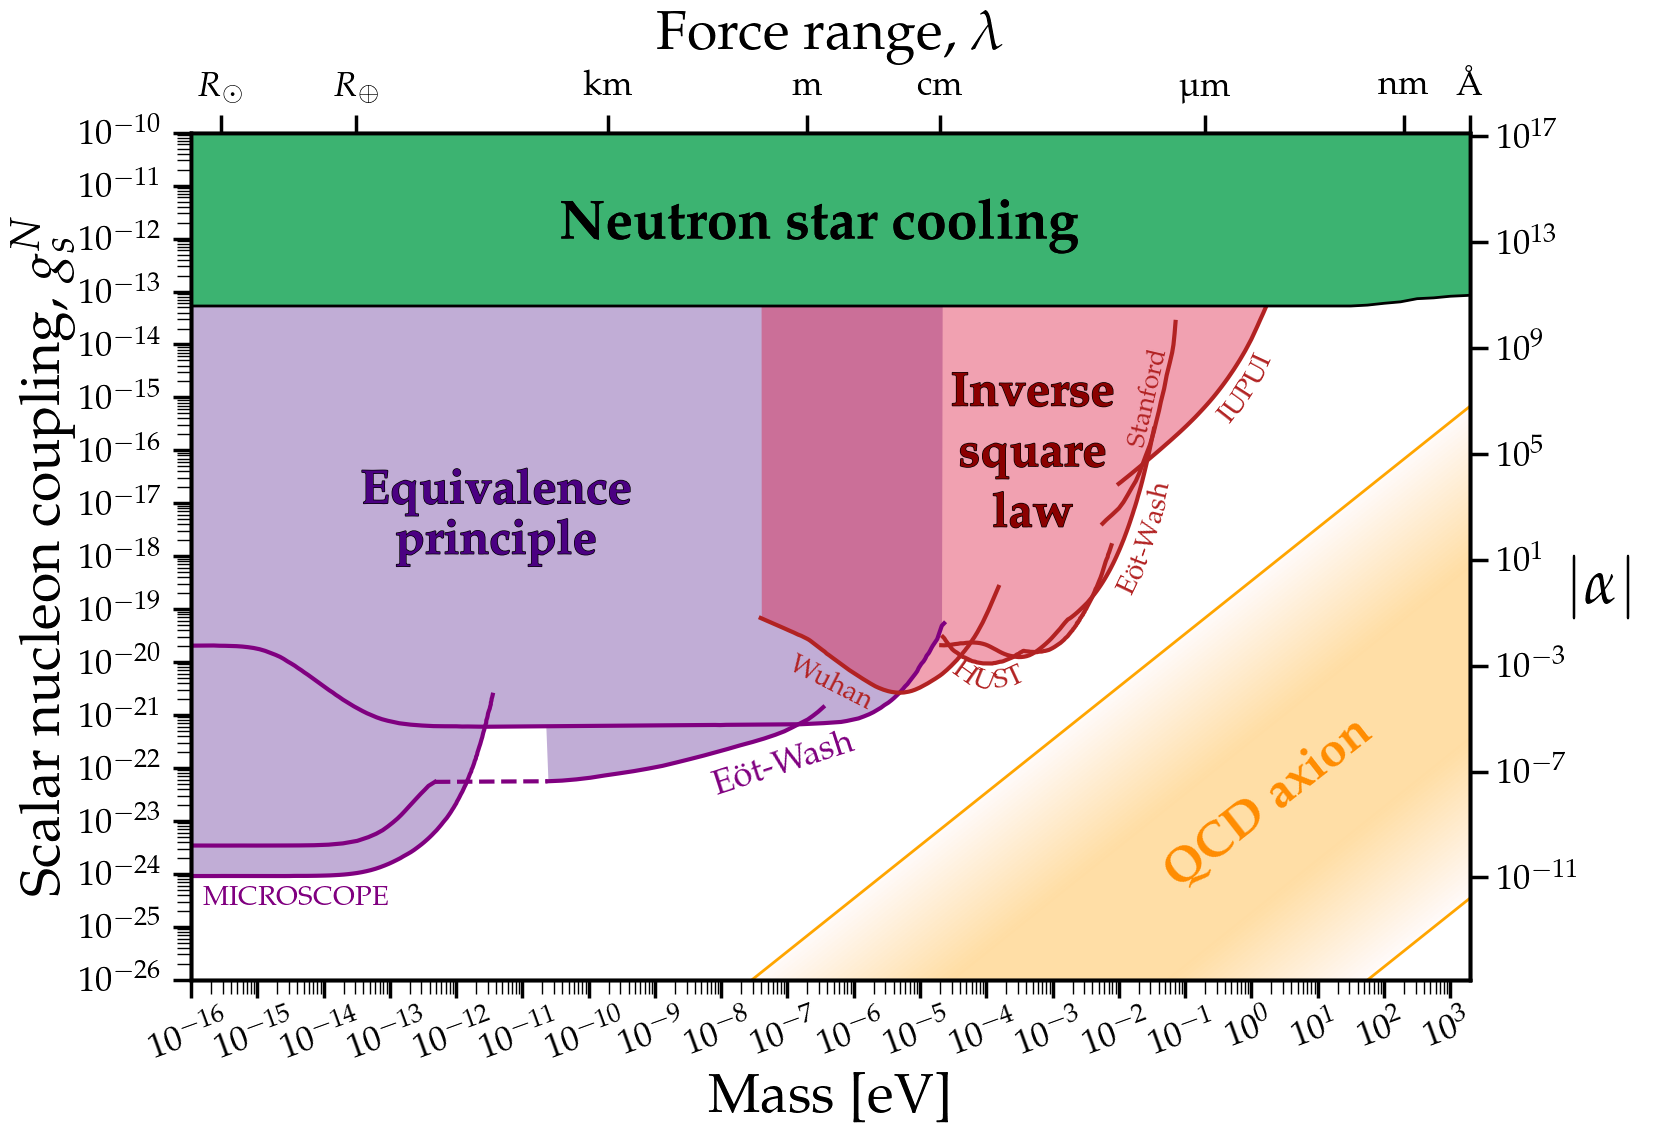

In [56]:

dirc = "limit_data/ScalarNucleon/"
g_scale=1
lw=3
RG_col='mediumseagreen'
ISL_col='crimson'
ISL_text_col='darkred'
ISL_line_col='firebrick'
EP_col='rebeccapurple'
EP_text_col='indigo'
EP_line_col='purple'
small_fs=20
med_fs=30
large_fs=35
lfs=45
        
    
fig,ax = FigSetup(ylab=r'Scalar nucleon coupling, $g_s^N$',\
                           Shape='Rectangular',mathpazo=True)
         
# Stellar cooling
dat = loadtxt(dirc+'NeutronStars.txt')
plt.fill_between(dat[:,0],dat[:,1],y2=1e0,color=RG_col,alpha=1,zorder=10)
plt.plot(dat[:,0],dat[:,1],'k-',zorder=10,lw=2)
plt.text(0.3e-6,1e-12,r'{\bf Neutron star cooling}',color='k',zorder=10,fontsize=large_fs+5,ha='center',path_effects=line_background(0,'k'))

# Fill in equivalence principle and inverse square law 
zo = 0.01
DAT = loadtxt(dirc+'Union_EquivalencePrinciple.txt')
plt.fill_between(DAT[:,0],g_scale*DAT[:,1],y2=1e0,color=EP_col,alpha=0.4,zorder=zo,lw=0)

DAT = loadtxt(dirc+'Union_InverseSquareLaw.txt')
plt.fill_between(DAT[:,0],g_scale*DAT[:,1],y2=1e0,color=ISL_col,alpha=0.4,zorder=zo,lw=0)


zo = 0.01
text_col = ISL_text_col
line_col = ISL_line_col
# IUPUI differential force measurement https://arxiv.org/pdf/1410.7267.pdf
dat = loadtxt(dirc+'IUPUI.txt')
dat[:,0] = mLambda(dat[:,0])
dat[:,1] = g_scalar_nucleon(dat[:,1])*g_scale
plt.plot(dat[:,0],dat[:,1],'-',zorder=zo,color=line_col,lw=lw)
txt = CurvedText(flipud(dat[:-30,0])*1.5,flipud(dat[:-30,1])/4,color=line_col,text=r'IUPUI',va = 'bottom',axes = ax,fontsize=small_fs)


# Eot-Wash
dat1 = loadtxt(dirc+'EotWash2006.txt') # EotWash 2006 https://arxiv.org/pdf/hep-ph/0611184.pdf
dat1[:,0] = mLambda(dat1[:,0])
dat1[:,1] = g_scalar_nucleon(dat1[:,1])*g_scale
dat2 = loadtxt(dirc+'EotWash2020.txt') # EotWash 2020 https://arxiv.org/pdf/2002.11761.pdf
dat2[:,0] = mLambda(dat2[:,0])
dat2[:,1] = g_scalar_nucleon(dat2[:,1])*g_scale
dat1 = dat1[dat1[:,0]<1.6e-3]
dat2 = dat2[dat2[:,0]>1.6e-3]
dat = vstack((dat2,dat1))
plt.plot(dat[:,0],dat[:,1],'-',zorder=zo,color=line_col,lw=lw)
txt = CurvedText(flipud(dat[:-70,0])*1.7,flipud(dat[:-70,1])/4,color=line_col,text=r'Eöt-Wash',va = 'bottom',axes = ax,fontsize=small_fs)

# Stanford https://arxiv.org/pdf/0802.2350.pdf 
dat = loadtxt(dirc+'Stanford.txt')
dat[:,0] = mLambda(dat[:,0])
dat[:,1] = g_scalar_nucleon(dat[:,1])*g_scale
plt.plot(dat[:,0],dat[:,1],'-',zorder=zo,color=line_col,lw=lw)
plt.text(3.5e-2,0.9e-15,r'Stanford',rotation=77,rotation_mode='anchor',ha='center',color=line_col,fontsize=small_fs-1)

# HUST
dat1 = loadtxt(dirc+'HUST2012.txt') # HUST 2012 https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.108.081101
dat1[:,0] = mLambda(dat1[:,0])
dat1[:,1] = g_scalar_nucleon(dat1[:,1])*g_scale
dat2 = loadtxt(dirc+'HUST2020.txt') #  HUST 2020 https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.124.051301
dat2[:,0] = mLambda(dat2[:,0])
dat2[:,1] = g_scalar_nucleon(dat2[:,1])*g_scale
dat1 = dat1[dat1[:,0]<3.7e-4]
dat2 = dat2[dat2[:,0]>3.7e-4]
dat = vstack((dat2,dat1))
plt.plot(dat[:,0],dat[:,1],'-',zorder=zo,color=line_col,lw=lw)
txt = CurvedText(flipud(dat[:,0])*1.25,flipud(dat[:,1])/4,color=line_col,text=r'HUST',va = 'bottom',axes = ax,fontsize=small_fs)

# Irvine  10.1103/PhysRevD.32.3084
# dat = loadtxt(dirc+'Irvine.txt')
# dat[:,0] = mLambda(dat[:,0])
# dat[:,1] = g_scalar_nucleon(dat[:,1])*g_scale
# plt.plot(dat[:,0],dat[:,1],'k--',zorder=zo,color=line_col,lw=lw)
# plt.text(0.9e-7,0.7e-19,r'Irvine',rotation=-25,rotation_mode='anchor',ha='center',color=line_col,fontsize=small_fs)

# Wuhan AAF https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.126.211101
dat = loadtxt(dirc+'Wuhan.txt')
dat[:,0] = mLambda(dat[:,0])
dat[:,1] = g_scalar_nucleon(dat[:,1])*g_scale
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=100)
plt.text(4e-7,0.3e-20,r'Wuhan',rotation=-27,rotation_mode='anchor',ha='center',color=line_col,fontsize=small_fs)


text_col = EP_text_col
line_col = EP_line_col
# EotWash EP 10.1103/PhysRevD.61.022001 
dat = loadtxt(dirc+'EotWash_EP_1999.txt')
dat[:,0] = mLambda(dat[:,0])
dat[:,1] = g_scalar_nucleon(dat[:,1])*g_scale
plt.plot(dat[:,0],dat[:,1],'-',zorder=zo,color=line_col,lw=lw)

# EotWash EP test 2007 10.1103/PhysRevD.61.022001 
dat1 = flipud(loadtxt(dirc+'EotWash_EP_2007_right.txt'))
dat1[:,0] = mLambda(dat1[:,0])
dat1[:,1] = g_scalar_nucleon(dat1[:,1])*g_scale
dat2 = flipud(loadtxt(dirc+'EotWash_EP_2007_left.txt'))
dat2[:,0] = mLambda(dat2[:,0])
dat2[:,1] = g_scalar_nucleon(dat2[:,1])*g_scale
dat_join = vstack((dat1[-1,:],dat2[0,:]))
dat_joined = vstack((dat1,dat2))
plt.plot(dat1[:,0],dat1[:,1],'-',zorder=zo,color=line_col,lw=lw)
plt.plot(dat2[:,0],dat2[:,1],'-',zorder=zo,color=line_col,lw=lw)
plt.plot(dat_join[:,0],dat_join[:,1],'--',zorder=zo,color=line_col,lw=lw)
plt.text(9.5e-9,2e-23,r'E\"ot-Wash',rotation=18,rotation_mode='anchor',\
                 color=line_col,va = 'bottom',fontsize=small_fs+5)

# MICROSCOPE satellite https://arxiv.org/pdf/1712.00483.pdf
dat = loadtxt(dirc+'MICROSCOPE.txt')
dat[:,0] = mLambda(dat[:,0])
dat[:,1] = g_scalar_nucleon(dat[:,1])*g_scale
plt.plot(dat[:,0],dat[:,1],'-',zorder=zo,color=line_col,lw=lw)
plt.text(1.5e-16,2.5e-25,'MICROSCOPE',color=line_col,fontsize=small_fs)


# Labels
plt.text(5e-4,0.7e-15,r'\begin{center}{\bf Inverse \linebreak square \linebreak law}\end{center}',color=ISL_text_col,ha='center',fontsize=large_fs,path_effects=line_background(1,'k'))
#plt.text(2e-4,1e-14/9,r'{\bf law tests}',color=ISL_text_col,ha='center',fontsize=large_fs)
plt.text(4e-12,1e-17,r'{\bf Equivalence}',color=EP_text_col,ha='center',fontsize=large_fs,path_effects=line_background(1,'k'))
plt.text(4e-12,1e-17/9,r'{\bf principle}',color=EP_text_col,ha='center',fontsize=large_fs,path_effects=line_background(1,'k'))
#plt.gcf().text(0.89,0.14,r'{\bf Monopole-monopole}',fontsize=med_fs+10,ha='right')

            
ax3 = ax.twinx()
g_min = ax.get_ylim()[0]
g_max = ax.get_ylim()[1]
ax3.set_ylim([1.37e37*g_min**2,1.37e37*g_max**2])
ax3.set_yscale('log')
ax3.set_ylabel(r"$|\alpha|$",fontsize=lfs,rotation=0,labelpad=20)
ax3.tick_params(which='major',direction='out',width=2.5,length=13,pad=7)
ax3.tick_params(which='minor',direction='out',width=1,length=10)
plt.sca(ax)
                

#BlackHoleSpins(ax,label_position=[1e-12,3e-26],rotation=0,fs=20,PlotLine=False)


# QCD Axion band taken from https://arxiv.org/pdf/2407.15928
m_n = 0.93957
m_vals = array([1e-16,1e4])
# g_QCD_lower = 1e-29*(m_vals/5.7e-3)
# g_QCD_upper = 2e-21*(m_vals/5.7e-3)
g_QCD_lower = 1.7471544083499104e-26*(m_vals/100)
g_QCD_upper = 3.4177660487474437e-17*(m_vals/100)
for i in logspace(0,3,30):
    ax.fill_between(m_vals,g_QCD_lower*i,y2=g_QCD_upper/i,color='orange',\
                    alpha=0.01,zorder=-100,lw=3)
ax.plot(m_vals,g_QCD_lower,'-',color='orange',alpha=1,lw=2)
ax.plot(m_vals,g_QCD_upper,'-',color='orange',alpha=1,lw=2)
ax.text(4e-2,0.06e-23,r'{\bf QCD axion}',fontsize=35,color='darkorange',rotation=38)



MySaveFig(fig,'ScalarNucleon')
#==============================================================================#

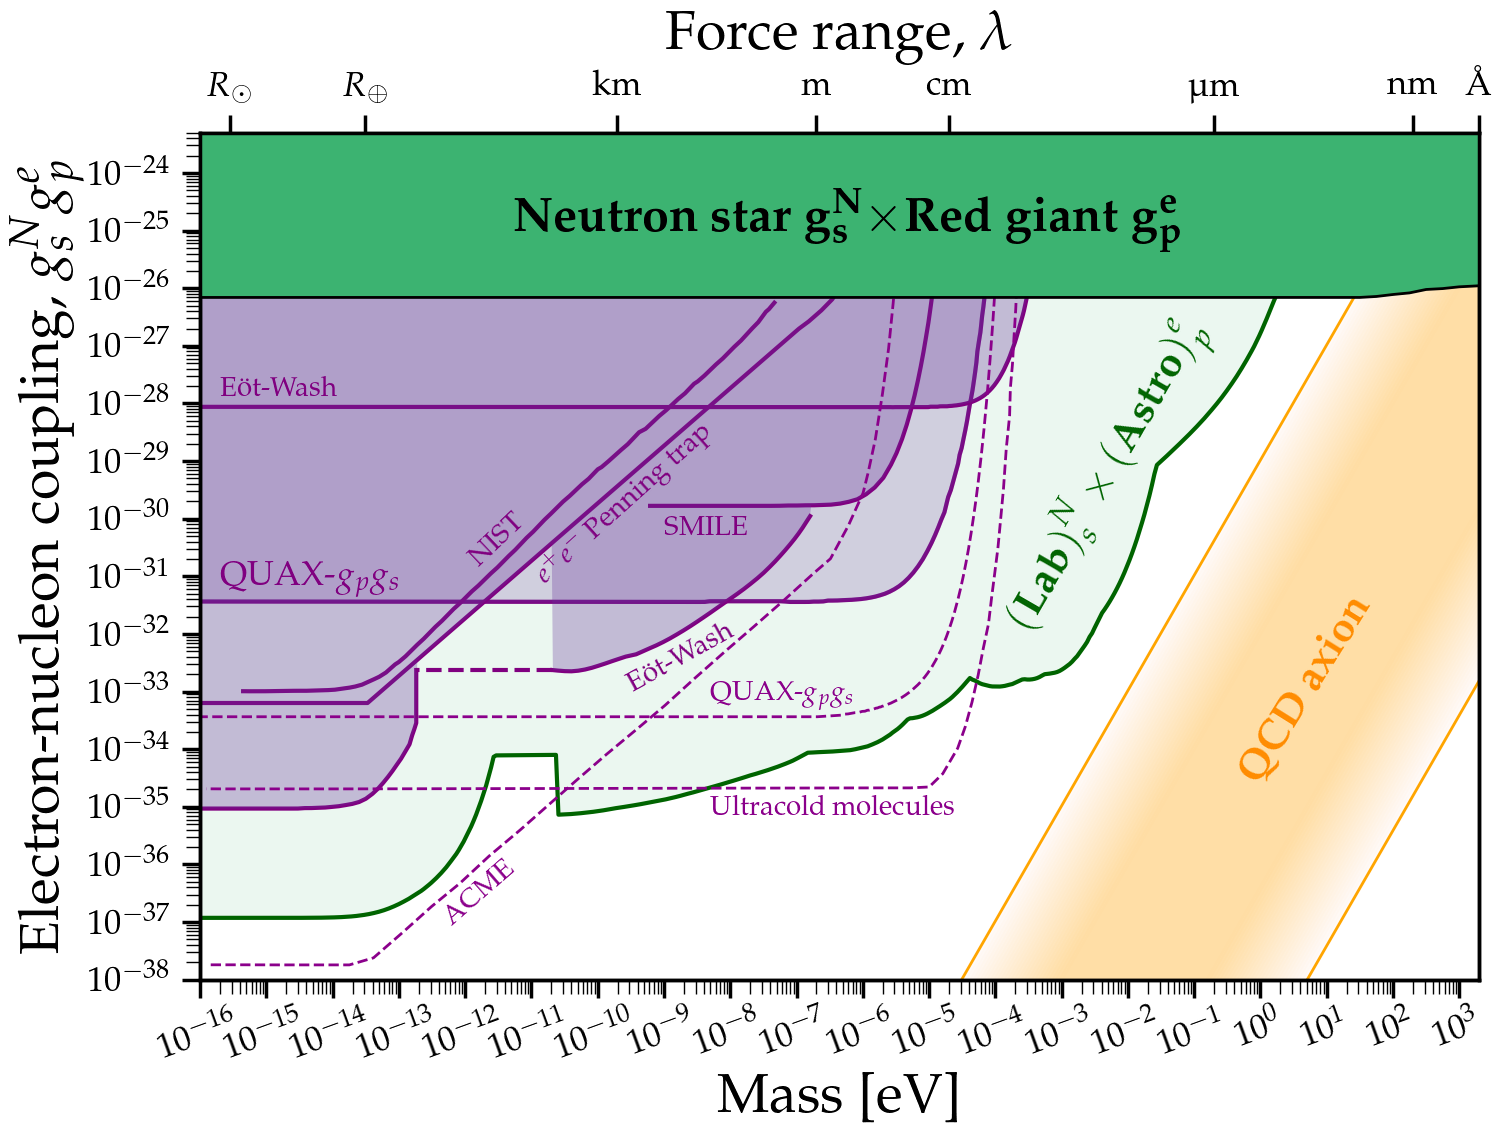

In [57]:
fig,ax = FigSetup(ylab=r'Electron-nucleon coupling, $g_s^N g_p^e$',Shape='Rectangular',mathpazo=True,\
                          g_min=1e-38,g_max=5e-24)

lw = 3
small_fs = 20
med_fs = 25



#==============================================================================#
col = 'mediumseagreen'
line_col = 'darkgreen'
zo = 0
g_p_e_lim = loadtxt('limit_data/AxionElectron/RedGiants.txt')[0,1]
g_s_N_lim = loadtxt('limit_data/ScalarNucleon/NeutronStars.txt')[0,-1]

DAT = loadtxt('limit_data/ScalarNucleon/Union.txt')
plt.fill_between(DAT[:,0],g_p_e_lim*DAT[:,1],y2=1e0,color=col,alpha=0.1,zorder=zo)
plt.plot(DAT[:,0],g_p_e_lim*DAT[:,1],'-',color=line_col,lw=3)
plt.text(0.7e-2,0.05e-28,r'${\bf(Lab)}_s^N\times {\bf(Astro)}_p^e$',\
         rotation=60,rotation_mode='anchor',ha='center',fontsize=30,color=line_col)


NS = loadtxt('limit_data/ScalarNucleon/NeutronStars.txt')
plt.fill_between(NS[:,0],NS[:,1]*g_p_e_lim,y2=1e0,color=col,alpha=1,zorder=100)
plt.plot(NS[:,0],NS[:,1]*g_p_e_lim,'-',color='k',lw=2,zorder=100)
plt.text(0.6e-6,1e-25,r'{\bf Neutron star} $\mathbf{g}_\mathbf{s}^\mathbf{N} \times ${\bf Red giant} $ \mathbf{g}_\mathbf{p}^\mathbf{e}$',\
         fontsize=35,color='k',zorder=101,ha='center')
#==============================================================================#






#==============================================================================#
dirc = 'limit_data/MonopoleDipole/ElectronNucleon/'
text_col = 'purple'
line_col = 'purple'
col = 'rebeccapurple'
zo = 1

# QUAX limit https://arxiv.org/pdf/2011.07100.pdf
dat = loadtxt(dirc+'QUAX_2020.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.fill_between(dat[:,0],dat[:,1],y2=1,lw=lw,color=col,alpha=0.2,zorder=zo)
plt.text(2e-16,7e-32,'QUAX-$g_p g_s$',color=line_col,fontsize=med_fs)


# QUAX projection https://arxiv.org/pdf/1606.04751.pdf
dat = flipud(loadtxt(dirc+'QUAX_RLC.txt'))
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color='darkmagenta')
plt.text(0.5e-8,0.7e-33,'QUAX-$g_p g_s$',color='darkmagenta',fontsize=small_fs,rotation=0)


# Torsio/Magnetometer
text_col = 'purple'
line_col = 'purple'
col = 'rebeccapurple'
zo = 1

# Washington (Hoedl) 10.1103/PhysRevLett.106.041801
dat = loadtxt(dirc+'Washington_Hoedl.txt')
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
# Washington (Terrano) 10.1103/PhysRevLett.115.201801
dat = loadtxt(dirc+'Washington_Terrano.txt')
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(2e-16,1.3e-28,r'E\"ot-Wash',color=line_col,fontsize=small_fs,rotation=0)


# # Amherst 10.1103/PhysRevLett.77.2170
# dat = loadtxt(dirc+'Amherst.txt')
# plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
# plt.fill_between(dat[:,0],dat[:,1],y2=1,lw=lw,color=col,alpha=0.5,zorder=zo)
# plt.text(0.8e-11,0.15e-28,'Amherst',color=line_col,fontsize=med_fs)


# EotWash https://arxiv.org/pdf/0808.2673.pdf
dat1 = flipud(loadtxt(dirc+'EotWash_left.txt'))
dat1[:,0] = mLambda(dat1[:,0])
plt.plot(dat1[:,0],dat1[:,1],'-',lw=lw,color=line_col,zorder=zo)
dat2 = flipud(loadtxt(dirc+'EotWash_right.txt'))
dat2[:,0] = mLambda(dat2[:,0])
plt.plot(dat2[:,0],dat2[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.plot([dat1[0,0],dat2[-1,0]],[dat1[0,1],dat2[-1,1]],'--',lw=lw,color=line_col)
plt.text(2e-9,3e-33,r'E\"ot-Wash',color=line_col,\
         fontsize=small_fs,rotation=29,rotation_mode='anchor',ha='center')


# NIST (Wineland) 10.1103/PhysRevLett.67.1735
dat = loadtxt(dirc+'NIST.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(1e-12,1.5e-31,'NIST',color=line_col,fontsize=small_fs,rotation=43.5)


# SMILE https://arxiv.org/pdf/1801.02757.pdf
dat = loadtxt(dirc+'SMILE.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:-4,0],dat[:-4,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(1e-9,0.5e-30,'SMILE',color=line_col,fontsize=small_fs,rotation=0)

# XENON1T S2
# Xenon = loadtxt('limit_data/AxionElectron/XENON1T_DM_S2.txt')
# plt.fill_between(Xenon[:,0],Xenon[:,1]*g_s_N_lim,y2=1e1,lw=lw,color='firebrick',zorder=-99)
# plt.plot(Xenon[:,0],Xenon[:,1]*g_s_N_lim,'k-',zorder=-99)
# Xenon = loadtxt('limit_data/AxionElectron/XENON1T_DM_SE.txt')
# plt.fill_between(Xenon[:,0],Xenon[:,1]*g_s_N_lim,y2=1e1,lw=lw,color='firebrick',zorder=-99)
# plt.plot(Xenon[:,0],Xenon[:,1]*g_s_N_lim,'k-',zorder=-99)
# Xenon = loadtxt('limit_data/AxionElectron/XENONnT.txt')
# plt.fill_between(Xenon[:,0],Xenon[:,1]*g_s_N_lim,y2=1e1,lw=lw,color='firebrick',zorder=-99)
# plt.plot(Xenon[:,0],Xenon[:,1]*g_s_N_lim,'k-',zorder=-99)
# plt.text(0.5e2,0.05e-25,r'XENONnT',color='firebrick',fontsize=small_fs+2,rotation=0,ha='center')
# plt.text(2e2/3,0.05e-25/4.5,r'${\rm(Astro)}_s^N$$\times$${\rm(DM)}_p^e$',color='firebrick',fontsize=small_fs-3,rotation=0,ha='center')


# # Magnon
# DAT = loadtxt('limit_data/ScalarNucleon/Union.txt')
# Casper = loadtxt('limit_data/AxionElectron/Projections/Magnon.txt')
# m = Casper[:,0]
# Casper = interp(DAT[:,0],Casper[:,0],Casper[:,1])
# Casper[DAT[:,0]>amax(m)] = nan 
# Casper[DAT[:,0]<amin(m)] = nan 
# y1 = Casper*DAT[:,1]
# plt.plot(DAT[:,0],y1,':',lw=lw,color='crimson',zorder=zo)
# plt.text(0.13e-1,5e-27,'Magnons',color='crimson',fontsize=small_fs,rotation=65,ha='center',rotation_mode='anchor')
# plt.text(0.13e-1*4,5e-27/2,r'${\rm(Lab)}_s^N$$\times$${\rm(DM)}_p^e$',color='crimson',fontsize=small_fs-3,rotation=65,ha='center',rotation_mode='anchor')


# Penning trap
dat = loadtxt(dirc+'PenningTrap.txt')
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(0.95e-11,0.8e-31,r'$e^+ e^-$ Penning trap',color=line_col,fontsize=small_fs,rotation=42)


# Union
DAT = loadtxt(dirc+'Union_TorsionMagnetometer.txt')
plt.fill_between(DAT[:,0],DAT[:,1],y2=1,lw=0,color=col,alpha=0.3,zorder=zo)
#plt.gcf().text(0.89,0.14,r'{\bf Monopole-dipole}',fontsize=med_fs+10,ha='right')


# ACME projection and others
line_col = 'darkmagenta'
dat = flipud(loadtxt(dirc+'ACME.txt'))
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color=line_col)
plt.text(0.4e-12,0.9e-37,'ACME',color=line_col,fontsize=small_fs,rotation=41)
dat = flipud(loadtxt(dirc+'UltracoldMolecules.txt'))
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color=line_col)
plt.text(0.5e-8,0.7e-35,'Ultracold molecules',color=line_col,fontsize=small_fs,rotation=0)


# QCD axion
m_e = 511.0/1e6
m_vals = array([1e-16,1e4])
# g_QCD_lower = 1e-29*1e-9*0.024*m_e*(m_vals/5.7e-3)**2
# g_QCD_upper = 2e-21*1e-9*1/3*m_e*(m_vals/5.7e-3)**2
g_QCD_lower = 3.884058069339637e-38*(m_vals/10)**2
g_QCD_upper = 1.0419746251239612e-27*(m_vals/10)**2
for i in logspace(0,3,30):
    ax.fill_between(m_vals,g_QCD_lower*i,y2=g_QCD_upper/i,color='orange',alpha=0.01,zorder=-100,lw=3)
ax.plot(m_vals,g_QCD_lower,color='orange',lw=2)
ax.plot(m_vals,g_QCD_upper,color='orange',lw=2)
ax.text(4e-1,0.3e-34,r'{\bf QCD axion}',fontsize=30,color='darkorange',rotation=58)


#BlackHoleSpins(ax,label_position=[1e-12,3e-38],rotation=0,fs=20,PlotLine=False)




MySaveFig(fig,'MonopoleDipole_ElectronNucleon')



In [13]:
dirc = 'limit_data/MonopoleDipole/ElectronNucleon/'

# Make Union of nucleon electron limits
#==============================================================================#
dat1 = loadtxt(dirc+'Washington_Hoedl.txt')
dat2 = loadtxt(dirc+'Washington_Terrano.txt')

dat3 = flipud(loadtxt(dirc+'EotWash_left.txt'))
dat3[:,0] = mLambda(dat3[:,0])

dat4 = flipud(loadtxt(dirc+'EotWash_right.txt'))
dat4[:,0] = mLambda(dat4[:,0])

dat5 = flipud(loadtxt(dirc+'NIST.txt'))
dat5[:,0] = mLambda(dat5[:,0])

dat6 = flipud(loadtxt(dirc+'SMILE.txt'))
dat6[:,0] = mLambda(dat6[:,0])

dat7 = loadtxt(dirc+'PenningTrap.txt')

m_min = amin(array([dat1[0,0],dat2[0,0],dat3[0,0],dat4[0,0],dat5[0,0],dat6[0,0],dat7[0,0]]))
m_max = amax(array([dat1[-1,0],dat2[-1,0],dat3[-1,0],dat4[-1,0],dat5[-1,0],dat6[-1,0],dat7[-1,0]]))

nvals = 1000
files = [dat1,dat2,dat3,dat4,dat5,dat6,dat7]
m = logspace(log10(m_min),log10(m_max),nvals)
dats = zeros(shape=(7,nvals))
for i in range(0,7):
    dat = files[i]
    x = dat[:,0]
    y = dat[:,1]
    ynew = interp(m,x,y)
    ynew[m<amin(x)] = 1e0
    ynew[m>amax(x)] = 1e0
    dats[i,:] = ynew

dat = amin(dats,0)
DAT = column_stack((m,dat))  

dirc = 'limit_data/MonopoleDipole/ElectronNucleon/'
header = 'Union of torsion and magnetometer limits \n m [eV] \t g_s*g_p [dimensionless]'
fname = 'Union_TorsionMagnetometer.txt'

savetxt(dirc+fname,DAT,header=header)
#==============================================================================#

#==============================================================================#
DAT = loadtxt('limit_data/ScalarNucleon/Union.txt')
g_p_e_lim = loadtxt('limit_data/AxionElectron/RedGiants.txt')[0,1]
savetxt(dirc+'UnionAstroLab.txt',column_stack((DAT[:,0],g_p_e_lim*DAT[:,1])),\
        header='Union of astro (g_p^e) x lab (g_s^N) limits \n m [eV] \t g^N_s*g^e_p [dimensionless]')
#==============================================================================#


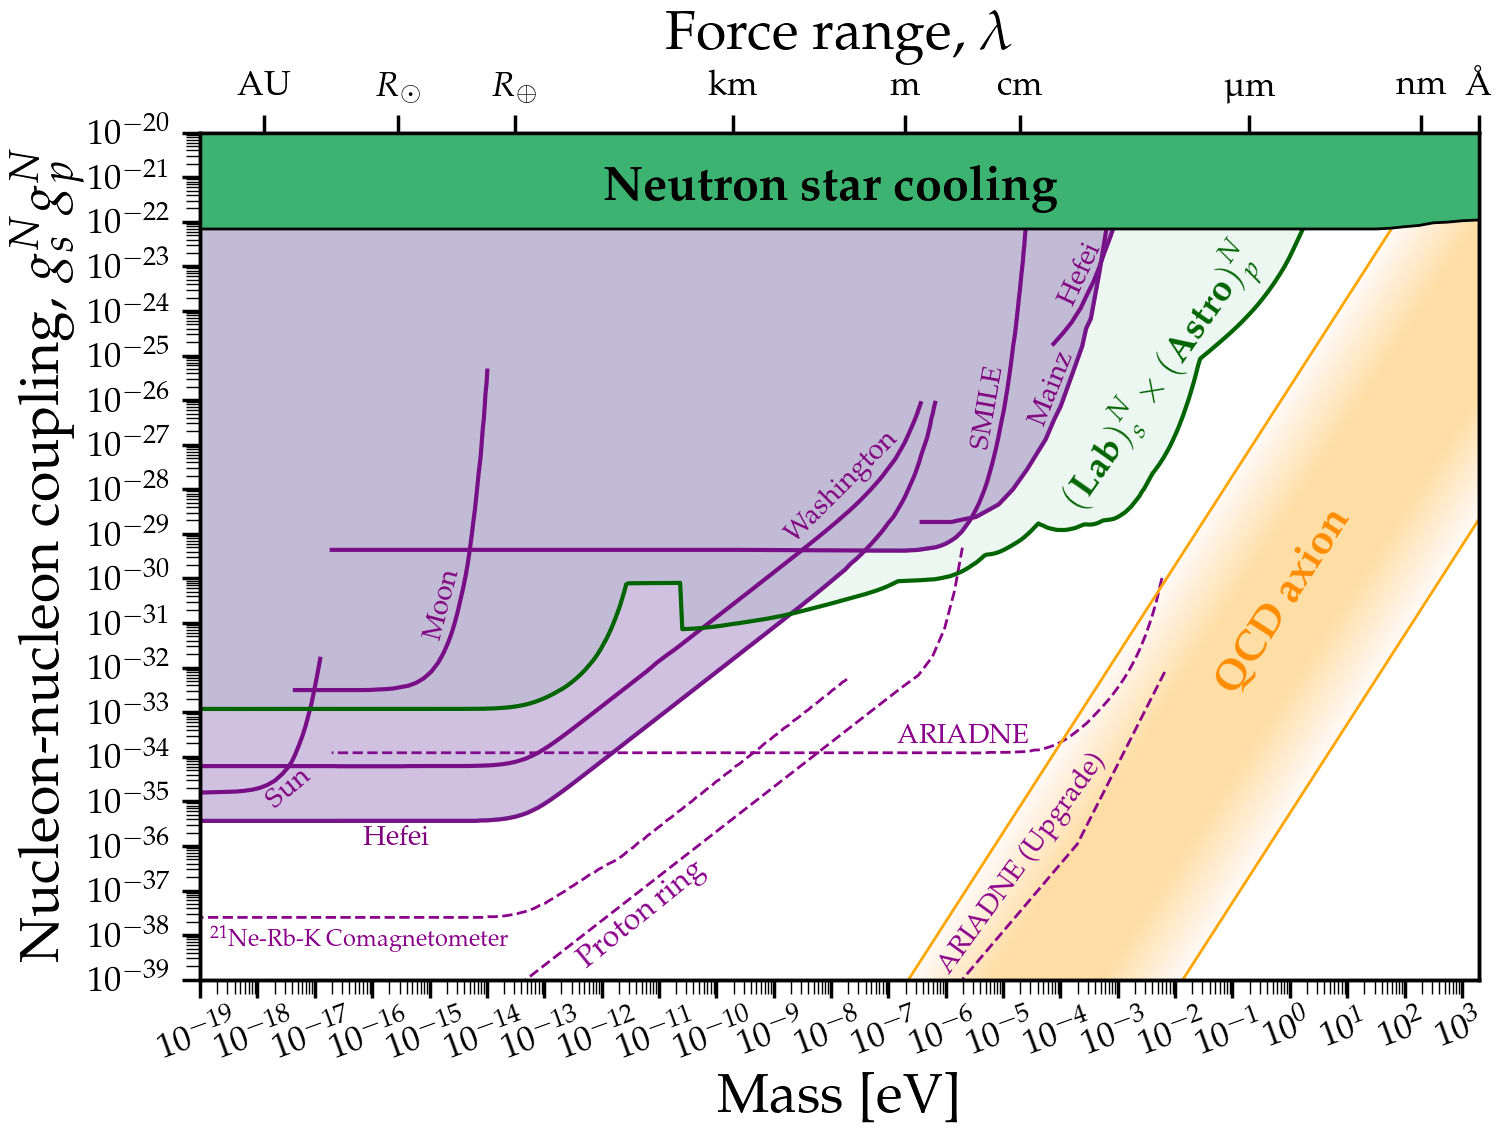

In [58]:
fig,ax = FigSetup(ylab=r'Nucleon-nucleon coupling, $g_s^N g_p^N$',Shape='Rectangular',mathpazo=True,\
                          g_min=1e-39,g_max=1e-20,m_min=1e-19)


#==============================================================================#
lw = 3
small_fs = 20
med_fs = 25

col = 'mediumseagreen'
line_col = 'darkgreen'
zo = 0
g_p_N_lim = loadtxt('limit_data/AxionNeutron/NeutronStars.txt')[0,-1]
g_s_N_lim = loadtxt('limit_data/ScalarNucleon/NeutronStars.txt')[0,-1]

DAT = loadtxt('limit_data/ScalarNucleon/Union.txt')
plt.fill_between(DAT[:,0],g_p_N_lim*DAT[:,1],y2=1e0,color=col,alpha=0.1,zorder=zo)
plt.plot(DAT[:,0],g_p_N_lim*DAT[:,1],'-',color=line_col,lw=3)
plt.text(8e-3,2.5e-26,r'${\bf(Lab)}_s^N\times {\bf(Astro)}_p^N$',rotation=55,rotation_mode='anchor',ha='center',fontsize=26,color=line_col)


glim = g_p_N_lim*g_s_N_lim
NS = loadtxt('limit_data/ScalarNucleon/NeutronStars.txt')
plt.fill_between(NS[:,0],NS[:,1]*g_p_N_lim,y2=1e0,color=col,alpha=1,zorder=100)
plt.plot(NS[:,0],NS[:,1]*g_p_N_lim,'-',color='k',lw=2,zorder=100)
plt.text(1e-8,0.3e-21,r'{\bf Neutron star cooling',fontsize=35,color='k',ha='center',zorder=101)

#==============================================================================#






#==============================================================================#
# ARIADNE
dirc = 'limit_data/MonopoleDipole/NucleonNucleon/'
text_col = 'darkmagenta'
line_col = 'darkmagenta'
col = 'darkmagenta'
zo = 1

# ARIADNE  https://arxiv.org/pdf/1403.1290.pdf
dat = loadtxt(dirc+'ARIADNE_projection1.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color=line_col,zorder=zo)
dat = loadtxt(dirc+'ARIADNE_projection2.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color=line_col,zorder=zo)
plt.text(20e-7,0.2e-33,'ARIADNE',color=line_col,fontsize=small_fs,ha='center')

plt.text(6.0e-7,0.15e-38,'ARIADNE (Upgrade)',color=line_col,fontsize=small_fs,rotation=54)

#==============================================================================#







#==============================================================================#

# Expts.
text_col = 'purple'
line_col = 'purple'
col = 'rebeccapurple'
zo = 1

# # Grenoble https://arxiv.org/pdf/1009.3434.pdf
# dat = loadtxt(dirc+'Grenoble.txt')
# dat[:,0] = mLambda(dat[:,0])
# plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
# plt.text(0.4e-4,0.3e-22,r'Grenoble',fontsize=small_fs,color=line_col,rotation=0)

# Amherst 10.1103/PhysRevLett.77.2170
# dat = loadtxt(dirc+'Amherst.txt')
# dat[:,1] *= 2 # to get 95%
# dat[:,0] = mLambda(dat[:,0])
# plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
# plt.text(0.3e-5,0.6e-25,r'Amherst',fontsize=small_fs,color=line_col,rotation=80)


# SMILE https://arxiv.org/pdf/1801.02757.pdf
dat = loadtxt(dirc+'SMILE.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(2.5e-6,1e-27,'SMILE',color=line_col,fontsize=small_fs,rotation=80)


# Mainz 10.1103/PhysRevLett.111.100801
dat = loadtxt(dirc+'Mainz.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(0.25e-4,0.3e-26,'Mainz',color=line_col,fontsize=small_fs,rotation=68)


# Washington 10.1103/PhysRevLett.68.135 Venema et al.
dat = loadtxt(dirc+'Washington.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(1.3e-9,0.7e-29,'Washington',color=line_col,fontsize=small_fs,rotation=45)


# Moon https://arxiv.org/pdf/2302.09096.pdf
dat = loadtxt(dirc+'Moon.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(0.7e-15,0.5e-31,'Moon',color=line_col,fontsize=small_fs,rotation=75)

# Sun https://arxiv.org/pdf/2302.09096.pdf
dat = loadtxt(dirc+'Sun.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(1.2e-18,0.7e-35,'Sun',color=line_col,fontsize=small_fs,rotation=40)

# Hefei - earth https://arxiv.org/pdf/2303.10352.pdf
dat = loadtxt(dirc+'Hefei.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(0.7e-16,0.1e-35,'Hefei',color=line_col,fontsize=small_fs,rotation=0)

# Hefei - mm https://arxiv.org/pdf/2205.13237.pdf
dat = loadtxt(dirc+'Hefei_mm.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'-',lw=lw,color=line_col,zorder=zo)
plt.text(0.8e-4,1.5e-24,'Hefei',color=line_col,fontsize=small_fs,rotation=65)


# union
DAT = loadtxt(dirc+'Union.txt')
plt.fill_between(DAT[:,0],DAT[:,1],y2=1,lw=lw,color=col,alpha=0.3,zorder=zo)


# CASPER
# DAT = loadtxt('limit_data/ScalarNucleon/Union.txt')
# Casper = loadtxt('limit_data/AxionNeutron/Projections/CASPEr_wind.txt')
# Casper[:,1] *= 2*m_n
# m = Casper[:,0]
# Casper = interp(DAT[:,0],Casper[:,0],Casper[:,1])
# Casper[DAT[:,0]>amax(m)] = nan 
# Casper[DAT[:,0]<amin(m)] = nan 
# plt.plot(DAT[:,0],Casper*DAT[:,1],'--',lw=2,color='crimson',zorder=zo)
# plt.text(0.1e-9,0.3e-36,r'CASPEr-wind',color='crimson',fontsize=small_fs+2,rotation=28)
# plt.text(0.1e-9*2,0.3e-36/6,r'${\rm(Lab)}_s^N$$\times$${\rm(DM)}_p^N$',color='crimson',fontsize=small_fs-2,rotation=28)


# # Future comag
dat = loadtxt(dirc+'Comagnetometer_projection.txt')
dat[:,0] = mLambda(dat[:,0])
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color='darkmagenta',zorder=zo)
plt.text(1.5e-19,0.6e-38,r'$^{21}$Ne-Rb-K Comagnetometer',color='darkmagenta',fontsize=small_fs-3,rotation=0)
#plt.text(1.5e-16,0.6e-38/2.5,r'Comagnetometer',color='rebeccapurple',fontsize=small_fs-3,rotation=0)


# Proton ring projection 2210.17547
dat = loadtxt('limit_data/MonopoleDipole/NucleonNucleon/ProtonRing_projection.txt')
plt.plot(dat[:10,0],dat[:10,1],'--',lw=2,color='darkmagenta',zorder=zo)
plt.text(0.03e-11,0.2e-38,r'Proton ring',color='darkmagenta',fontsize=small_fs+2,rotation=39)

# Yb trap projection 2309.10023
# dat = loadtxt('limit_data/MonopoleDipole/NucleonNucleon/YbTrap_Mass.txt')
# plt.plot(dat[:10,0],dat[:10,1],'--',lw=2,color='navy',zorder=zo)
# plt.text(0.03e-11,0.2e-34,r'Yb trap',color='navy',fontsize=small_fs+2,rotation=39)


# QCD axion
m_n = 0.93957
m_vals = array([1e-16,1e4])
# g_QCD_lower = 1e-29*1e-9*0.16*m_n*(m_vals/5.7e-3)**2
# g_QCD_upper = 2e-21*1e-9*0.6*m_n*(m_vals/5.7e-3)**2
g_QCD_lower = 5.420539995213543e-34*(m_vals/10)**2
g_QCD_upper = 1.9936338092520608e-24*(m_vals/10)**2
for i in logspace(0,3,30):
    ax.fill_between(m_vals,g_QCD_lower*i,y2=g_QCD_upper/i,color='orange',alpha=0.01,zorder=-100,lw=3)
ax.plot(m_vals,g_QCD_lower,color='orange',lw=2)
ax.plot(m_vals,g_QCD_upper,color='orange',lw=2)
ax.text(4e-2,0.3e-32,r'{\bf QCD axion}',fontsize=30,color='darkorange',rotation=57)

#plt.gcf().text(0.89,0.14,r'{\bf Monopole-dipole}',fontsize=med_fs+10,ha='right',path_effects=line_background(5,'w'))

#BlackHoleSpins(ax,label_position=[1e-12,3e-39],rotation=0,fs=20,PlotLine=False)
MySaveFig(fig,'MonopoleDipole_NucleonNucleon')


In [46]:
# Make union of nucleon-nucleon limits
#==============================================================================#

nvals = 1000
dat1 = flipud(loadtxt(dirc+'Hefei.txt'))
dat1[:,0] = mLambda(dat1[:,0])

dat2 = flipud(loadtxt(dirc+'Amherst.txt'))
dat2[:,1] *= 2 # to get 95%
dat2[:,0] = mLambda(dat2[:,0])

dat3 = flipud(loadtxt(dirc+'SMILE.txt'))
dat3[:,0] = mLambda(dat3[:,0])

dat4 = flipud(loadtxt(dirc+'Mainz.txt'))
dat4[:,0] = mLambda(dat4[:,0])

dat5 = flipud(loadtxt(dirc+'Hefei_mm.txt'))
dat5[:,0] = mLambda(dat5[:,0])


m_min = amin(array([dat1[0,0],dat2[0,0],dat3[0,0],dat4[0,0]]))
m_max = amax(array([dat1[-1,0],dat2[-1,0],dat3[-1,0],dat5[-1,0]]))
files = [dat1,dat2,dat3,dat4,dat5]
nf = len(files)
m = logspace(log10(1e-30),log10(m_max),nvals)
dats = zeros(shape=(nf,nvals))
for i in range(0,nf):
    dat = files[i]
    x = dat[:,0]
    y = dat[:,1]
    ynew = 10.0**interp(log10(m),log10(x),log10(y))
    ynew[m<amin(x)] = 1e0
    ynew[m>amax(x)] = 1e0
    dats[i,:] = ynew

dat = amin(dats,0)
DAT = column_stack((m,dat))  

dirc = 'limit_data/MonopoleDipole/NucleonNucleon/'
header = 'Union of nucleon-nucleon limits \n m [eV] \t g_s*g_p [dimensionless]'
fname = 'Union.txt'

savetxt(dirc+fname,DAT,header=header)
#==============================================================================#


#==============================================================================#
DAT = loadtxt('limit_data/ScalarNucleon/Union.txt')
g_p_N_lim = loadtxt('limit_data/AxionNeutron/SN1987A.txt')[0,-1]
savetxt(dirc+'UnionAstroLab.txt',column_stack((DAT[:,0],g_p_N_lim*DAT[:,1])),\
        header='Union of astro (g_p^N) x lab (g_s^N) limits \n m [eV] \t g^N_s*g^N_p [dimensionless]')
#==============================================================================#


/var/folders/c5/ms4qz_795ll784bwyy3sqj3m0000gn/T/ipykernel_14723/784606209.py:89: RuntimeWarning: divide by zero encountered in true_divide
  ax1.plot(m,y1/y3,'-.',color='navy',lw=lw)
/var/folders/c5/ms4qz_795ll784bwyy3sqj3m0000gn/T/ipykernel_14723/784606209.py:96: RuntimeWarning: divide by zero encountered in true_divide
  ax1.plot(m,y1/y3,'-.',color='navy',lw=lw)


38.49327512746009
72.17489086398766
132.6643232071392


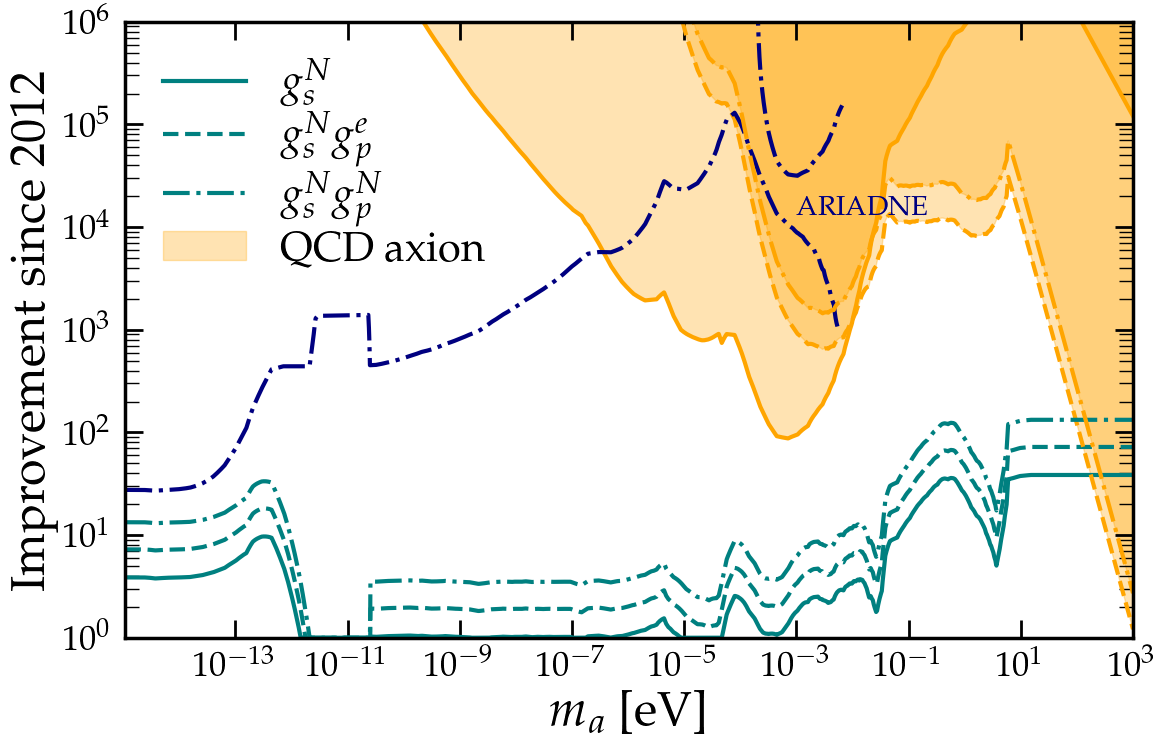

In [73]:
#==============================================================================#
# Improvement plot

from PlotFuncs import MySquarePlot
fig,ax1 = MySquarePlot('$m_a$ [eV]','Improvement since 2012',size_y=8,lfs=35)

nm = 10000
m_min = 1.1e-15
m_max = 1e3
m = logspace(log10(m_min),log10(m_max),nm)

line_col = 'teal'
alph = 0.3

# Scalar
g_S_N_2012 = 0.5e-10
g_S_N_2020 = 1.1e-12
g_QCD_upper = 2e-21*(m/5.7e-3)

Raff = flipud(loadtxt('limit_data/ScalarNucleon/Raffelt.txt'))
m1 = mLambda(Raff[:,0])
y1 = interp(m,m1,Raff[:,1])
y1[y1==0] = g_S_N_2012
y1[y1>g_S_N_2012] =g_S_N_2012

My = loadtxt('limit_data/ScalarNucleon/Union.txt')
y2 = interp(m,My[:,0],My[:,1])
y2[y2==0] = g_S_N_2020
y2[y2>g_S_N_2020] =g_S_N_2020


mask = y1<y2
y1[mask] = y2[mask]
max1 = amax(y1/y2)
ax1.plot(m,y1/y2,'-',lw=3,color=line_col,label=r'$g_s^N$')
ax1.plot(m,y1/g_QCD_upper,lw=3,color='orange')
ax1.fill_between(m,y1/g_QCD_upper,y2=1e10,color='orange',alpha=alph)


# Electron
g_p_e_2012 = 3e-13
g_p_e_2020 = 1.6e-13
g_QCD_upper = 2e-21*1e-9*1/3*m_e*(m/5.7e-3)**2

y1 = interp(m,m1,Raff[:,1]*g_p_e_2012)
y1[y1==0] = g_S_N_2012*g_p_e_2012
y1[y1>g_S_N_2012*g_p_e_2012] =g_S_N_2012*g_p_e_2012

y2 = interp(m,My[:,0],My[:,1]*g_p_e_2020)
y2[y2==0] = g_S_N_2020*g_p_e_2020
y2[y2>g_S_N_2020*g_p_e_2020] =g_S_N_2020*g_p_e_2020

mask = y1<y2
y1[mask] = y2[mask]


max2 = amax(y1/y2)
ax1.plot(m,y1/y2,'--',lw=3,color=line_col,label=r'$g_s^N g_p^e$')
ax1.plot(m,y1/g_QCD_upper,'--',lw=3,color='orange')
ax1.fill_between(m,y1/g_QCD_upper,y2=1e10,color='orange',alpha=alph)





# Electron
g_p_N_2012 = 9.65e-10
g_p_N_2020 = 2.8e-10
g_QCD_upper = 2e-21*1e-9*0.26*m_n*(m/5.7e-3)**2

y1 = interp(m,m1,Raff[:,1]*g_p_N_2012)
y1[y1==0] = g_S_N_2012*g_p_N_2012
y1[y1>g_S_N_2012*g_p_N_2012] =g_S_N_2012*g_p_N_2012

y2 = interp(m,My[:,0],My[:,1]*g_p_N_2020)
y2[y2==0] = g_S_N_2020*g_p_N_2020
y2[y2>g_S_N_2020*g_p_N_2020] =g_S_N_2020*g_p_N_2020

mask = y1<y2
y1[mask] = y2[mask]



dat = flipud(loadtxt('limit_data/MonopoleDipole/NucleonNucleon/ARIADNE_projection2.txt'))
dat[:,0] = mLambda(dat[:,0])
y3 = interp(m,dat[:,0],dat[:,1])
y3[m>dat[-1,0]]=0
y3[m<dat[0,0]]=0
ax1.plot(m,y1/y3,'-.',color='navy',lw=lw)

dat = flipud(loadtxt('limit_data/MonopoleDipole/NucleonNucleon/ARIADNE_projection1.txt'))
dat[:,0] = mLambda(dat[:,0])
y3 = interp(m,dat[:,0],dat[:,1])
y3[m>dat[-1,0]]=0
y3[m<dat[0,0]]=0
ax1.plot(m,y1/y3,'-.',color='navy',lw=lw)

max3 = amax(y1/y2)
ax1.plot(m,y1/y2,'-.',lw=3,color=line_col,label=r'$g_s^N g_p^N$')
ax1.plot(m,y1/g_QCD_upper,'-.',lw=3,color='orange')
ax1.fill_between(m,y1/g_QCD_upper,y2=1e10,color='orange',alpha=alph,label='QCD axion')


#plt.grid()
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlim([m_min,m_max])
ax1.set_ylim([1,1e6])
leg = plt.legend(fontsize=30,frameon=False,loc='upper left',edgecolor='k',labelspacing=0.1)
ax1.tick_params(pad=10)

plt.text(1e-3,1.3e4,r'ARIADNE',color='navy',fontsize=20)

#leg.get_frame().set_linewidth(2.5)

print(max1)
print(max2)
print(max3)

MySaveFig(fig,'Improvement')

In [9]:
# QCD band of g_s^n
m_n = 0.93957
m_u = 2.3
m_d = 4.8
sig = 38
print('g_S^N (upper) = ',1.2e-10*sig*m_u*m_d/(m_n*1000*(m_u+m_d)**2)*(m_n/1e9))
print('g_S^N (lower) = ',1e-18*sig*m_u*m_d/(m_n*1000*(m_u+m_d)**2)*(m_n/1e9))

g_S^N (upper) =  9.986589962309065e-22
g_S^N (lower) =  8.322158301924221e-30


In [10]:
sig*m_u*m_d/(m_n*1000*(m_u+m_d)**2)*(m_n/1e9)

8.322158301924221e-12